# ARIMA 

In [2]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


# Zadanie
Wczytaj dane "Shampoo Sales Dataset", które opisują miesięczną liczbę sprzedaży szamponu przez okres 3 lat.

In [3]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('.\sales-of-shampoo-over-a-three-ye.csv', header=0, 
                  parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
rng1 = pd.date_range('1901-01-01', periods=len(series), freq='M')
print(series.head())

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64


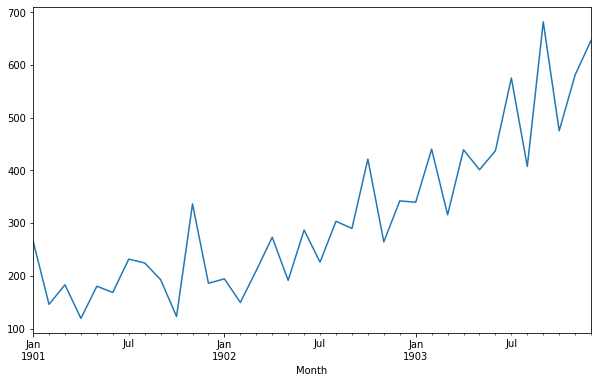

In [4]:
plt.figure(figsize=(10,6));
series.plot()
plt.show()

Po pierwsze, będziemy ostatni nasze modele na ostatnim roku. Biorąc pod uwagę dane miesięczne, oznacza to, że 12 ostatnich obserwacji zostanie wykorzystanych jako zbiór testowy.

W celu oceny skuteczności modelu, zastosujemy metodę walidacji walk-forward. Oznacza to, że nauczymy model na danych historycznych. Będziemy prognozować najbliższy punkt i oceniać poziom predykcji. Obserwacja zostanie następnie dodana do zestawu danych uczących i proces powtórzony.


In [5]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [6]:
X = series.values
train, test = X[0:-12], X[-12:]

In [7]:
print(series.index)
rng1 = pd.date_range('1900-12-01', periods=len(X)-12, freq='M').shift(1, freq='D')
rng2 =pd.date_range('1902-12-01', periods=12, freq='M').shift(1, freq='D')
print(rng1)
print(rng2)

DatetimeIndex(['1901-01-01', '1901-02-01', '1901-03-01', '1901-04-01',
               '1901-05-01', '1901-06-01', '1901-07-01', '1901-08-01',
               '1901-09-01', '1901-10-01', '1901-11-01', '1901-12-01',
               '1902-01-01', '1902-02-01', '1902-03-01', '1902-04-01',
               '1902-05-01', '1902-06-01', '1902-07-01', '1902-08-01',
               '1902-09-01', '1902-10-01', '1902-11-01', '1902-12-01',
               '1903-01-01', '1903-02-01', '1903-03-01', '1903-04-01',
               '1903-05-01', '1903-06-01', '1903-07-01', '1903-08-01',
               '1903-09-01', '1903-10-01', '1903-11-01', '1903-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)
DatetimeIndex(['1901-01-01', '1901-02-01', '1901-03-01', '1901-04-01',
               '1901-05-01', '1901-06-01', '1901-07-01', '1901-08-01',
               '1901-09-01', '1901-10-01', '1901-11-01', '1901-12-01',
               '1902-01-01', '1902-02-01', '1902-03-01', '1902-04-01',
             

In [8]:
#trainS=pd.Series(np.stack(predictions,1)[0], index=data['1955-05-01':'1960-05-01'].index)
trainS=pd.Series(train, index=rng1)
testS=pd.Series(test,index=rng2)

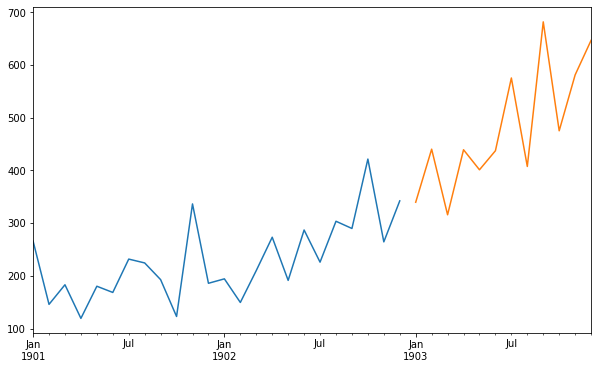

In [9]:
plt.figure(figsize=(10,6));
trainS.plot()
testS.plot()
plt.show()

# Zadanie
Naucz modela ARIMA(4,1,0)

Test RMSE: 84.832


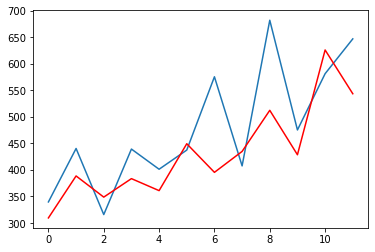

In [11]:
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()



In [14]:
history

[266.0,
 145.9,
 183.1,
 119.3,
 180.3,
 168.5,
 231.8,
 224.5,
 192.8,
 122.9,
 336.5,
 185.9,
 194.3,
 149.5,
 210.1,
 273.3,
 191.4,
 287.0,
 226.0,
 303.6,
 289.9,
 421.6,
 264.5,
 342.3,
 339.7,
 440.4,
 315.9,
 439.3,
 401.3,
 437.4,
 575.5,
 407.6,
 682.0,
 475.3,
 581.3,
 646.9]

In [11]:
predictions

[array([309.59069]),
 array([388.64160058]),
 array([348.77805305]),
 array([383.60209077]),
 array([360.99203028]),
 array([449.34207827]),
 array([395.44932296]),
 array([434.86494568]),
 array([512.30218274]),
 array([428.59727197]),
 array([625.9934258]),
 array([543.5389634])]

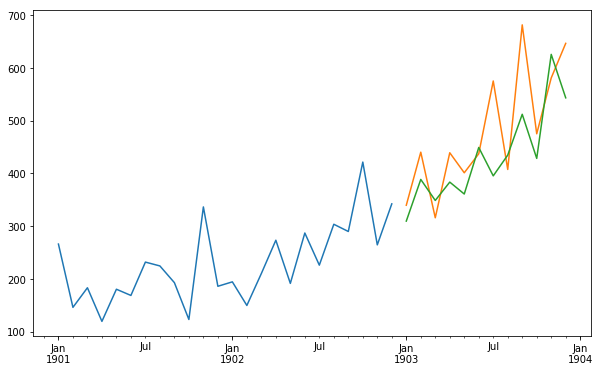

In [12]:
pre=pd.Series(np.stack(predictions,1)[0], index=testS.index)

plt.figure(figsize=(10,6));
trainS.plot()
testS.plot()
pre.plot()
plt.show()

# Jeżeli nie będe uczył co krok

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


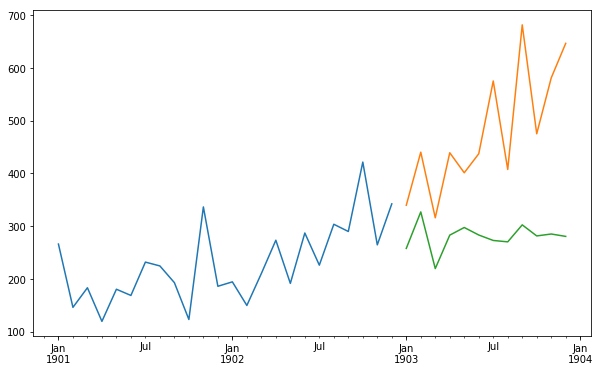

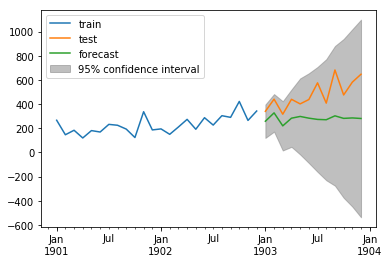

In [13]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

model = ARIMA(trainS, order=(4,2,0))
model_fit = model.fit()

predictions1 = model_fit.predict(start='1903-01-01',end='1903-12-01', dynamic=True, typ ='levels')
predictions = []
# for t in range(len(test)):
#     predictions.append(model_fit.forecast()[0][0])
# predictionsS=pd.Series(predictions,index=rng2)

plt.figure(figsize=(10,6));
trainS.plot()
testS.plot()
predictions1.plot()
plt.show()


fig, ax = plt.subplots()
ax = trainS.plot(label="train")
ax = testS.plot(label="test")
fig = model_fit.plot_predict(start='1903-01-01',end='1903-12-01', dynamic=True, ax=ax, plot_insample=False)
plt.show()

# Zad
Naucz model:

    * (2,1,2)
    * (4,2,3)
    * (4,1,3)
    * ...

# Zad

Wykonaj ARIMA na danych 

In [32]:
from pandas import Series
series = Series.from_csv('./sunspots.csv', header=0)
series.head()

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


YEAR
1700-01-01     5.0
1701-01-01    11.0
1702-01-01    16.0
1703-01-01    23.0
1704-01-01    36.0
Name: SUNACTIVITY, dtype: float64

In [33]:
series.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
series.index

DatetimeIndex(['1700-12-31', '1701-12-31', '1702-12-31', '1703-12-31',
               '1704-12-31', '1705-12-31', '1706-12-31', '1707-12-31',
               '1708-12-31', '1709-12-31',
               ...
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31'],
              dtype='datetime64[ns]', length=309, freq=None)

In [34]:
trainS=series.loc['1720':'1950']
testS=series.loc['1951':'2008']

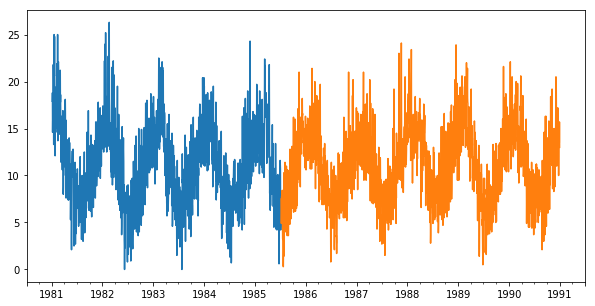

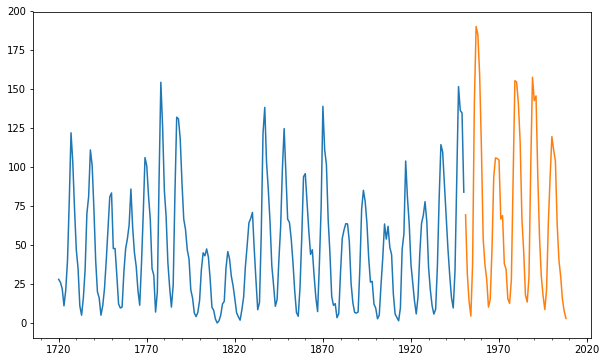

In [35]:
plt.figure(figsize=(10,6));
trainS.loc['1720':'1950'].plot()
testS.loc['1951':'2008'].plot()
plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_r

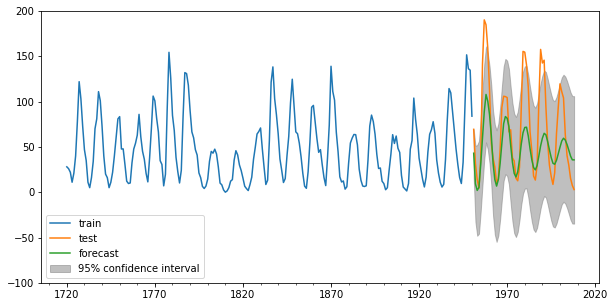

In [36]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

model = ARIMA(trainS, order=(10,0,10))
model_fit = model.fit()

# plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(10,5))
ax = trainS.plot(label="train")
ax = testS.plot(label="test")
fig = model_fit.plot_predict(start='1951',end='2008', dynamic=True, ax=ax, plot_insample=False)
ax.set_ylim([-100,200])
plt.show()

# Zad

Wykonaj ARIMA na danych 

In [19]:
from pandas import Series
series = Series.from_csv('.\daily-minimum-temperatures.csv', header=0)
series.head()

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: float64

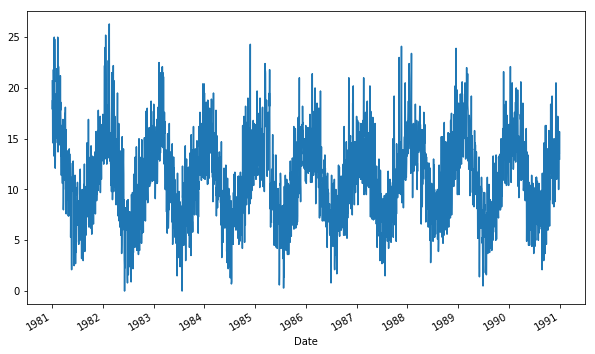

In [20]:
plt.figure(figsize=(10,6));
series.plot()
plt.show()

In [21]:
X = series.values
train, test = X[1:len(X)-2000], X[len(X)-2001:]

In [22]:
#trainS=pd.Series(np.stack(predictions,1)[0], index=data['1955-05-01':'1960-05-01'].index)
rng1 =pd.date_range(series.index[5], periods=len(X)-2001, freq='D')
trainS=pd.Series(train, index=rng1)
rng2 =pd.date_range(series.index[len(X)-2001], periods=2001, freq='D')
testS=pd.Series(test,index=rng2)
print(rng1)
print(rng2)

DatetimeIndex(['1981-01-06', '1981-01-07', '1981-01-08', '1981-01-09',
               '1981-01-10', '1981-01-11', '1981-01-12', '1981-01-13',
               '1981-01-14', '1981-01-15',
               ...
               '1985-06-30', '1985-07-01', '1985-07-02', '1985-07-03',
               '1985-07-04', '1985-07-05', '1985-07-06', '1985-07-07',
               '1985-07-08', '1985-07-09'],
              dtype='datetime64[ns]', length=1646, freq='D')
DatetimeIndex(['1985-07-09', '1985-07-10', '1985-07-11', '1985-07-12',
               '1985-07-13', '1985-07-14', '1985-07-15', '1985-07-16',
               '1985-07-17', '1985-07-18',
               ...
               '1990-12-21', '1990-12-22', '1990-12-23', '1990-12-24',
               '1990-12-25', '1990-12-26', '1990-12-27', '1990-12-28',
               '1990-12-29', '1990-12-30'],
              dtype='datetime64[ns]', length=2001, freq='D')


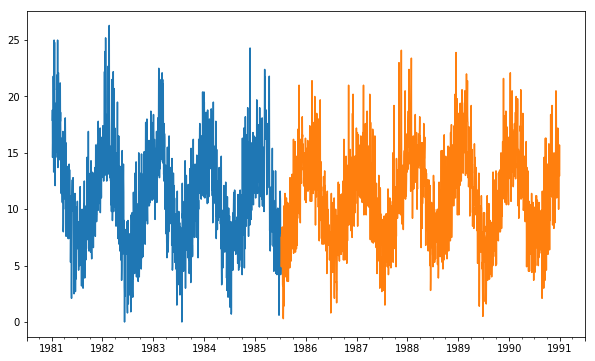

In [23]:
plt.figure(figsize=(10,6));
trainS.loc['1980':].plot()
testS.plot()
plt.show()

In [24]:
print(len(train))
print(len(test))

1646
2001


In [25]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

model = ARIMA(trainS, order=(4,2,0))
model_fit = model.fit()


C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


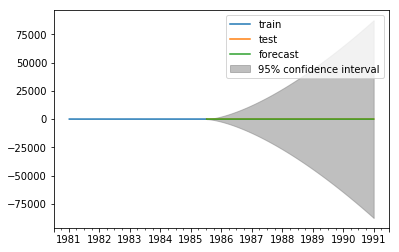

In [26]:
fig, ax = plt.subplots()
ax = trainS.plot(label="train")
ax = testS.plot(label="test")
fig = model_fit.plot_predict(start='1985-07-09',end='1990-12-30', dynamic=True, ax=ax, plot_insample=False)
plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


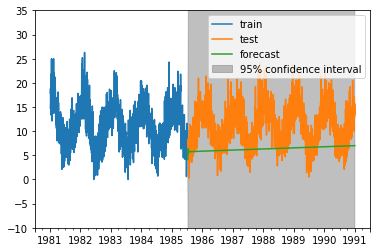

In [27]:
fig, ax = plt.subplots()
ax = trainS.plot(label="train")
ax = testS.plot(label="test")
fig = model_fit.plot_predict(start='1985-07-09',end='1990-12-30', dynamic=True, ax=ax, plot_insample=False)
ax.set_ylim([-10,35])
plt.show()

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


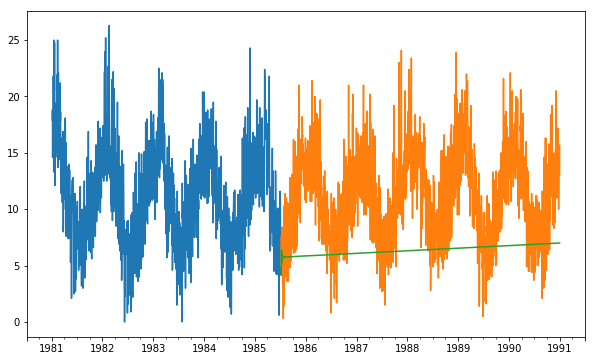

In [28]:
predictions1 = model_fit.predict(start='1985-07-09',end='1990-12-30', dynamic=True, typ ='levels')
predictions = []
# for t in range(len(test)):
#     predictions.append(model_fit.forecast()[0][0])
# predictionsS=pd.Series(predictions,index=rng2)

plt.figure(figsize=(10,6));
trainS.plot()
testS.plot()
predictions1.plot()
plt.show()


